In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [4]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.2
3.2.1


In [5]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



c:\Users\woute\anaconda3\Lib\site-packages\ema_workbench\em_framework\__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")


c:\Users\woute\anaconda3\python.exe


In [6]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

A.1
A.2
A.3


In [7]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [8]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [9]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Gelderland Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage'), function=<function sum_over at 0x000002720D3BE3E0>)
ScalarOutcome('Gelderland Dike Investment Costs', variable_name=('A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x000002720D3BE3E0>)
ScalarOutcome('Gelderland Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths'), function=<function sum_over at 0x000002720D3BE3E0>)
ScalarOutcome('Overijssel Expected Annual Damage', variable_name=('A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x000002720D3BE3E0>)
ScalarOutcome('Overijssel Dike Investment Costs', variable_name=('A.4_Dike Investment Costs', 'A.5_Dike Investment Costs'), function=<function sum_over at 0x000002720D3BE3E0>)
ScalarOutc

In [ ]:
# defining specific policies


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}

# For exploration without policies, policy 0 is a do-nothing policy
policies = [
    Policy(
        "policy 0",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 0, "1_RfR 0": 0, "2_RfR 0": 0}
        )
    ),


]

In [ ]:
# pass the policies list to EMA workbench experiment runs
# In no policy exploration, we only have the do-nothing policy
n_scenarios = 1000
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 18 workers
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
100%|██████████████████████████████████████| 1000/1000 [01:13<00:00, 13.57it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [14]:
experiments, outcomes = results

In [ ]:
# Save experiments as csv file
experiments_no_policy=pd.DataFrame(experiments)
experiments_no_policy.to_csv('experiments(no policy).csv', index=False)

In [ ]:
# Save outcomes as csv file
outcomes_no_policy=pd.DataFrame(outcomes)
outcomes_no_policy.to_csv('outcomes(no policy).csv', index=False)

In [18]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,Gelderland Expected Annual Damage,Gelderland Dike Investment Costs,Gelderland Expected Number of Deaths,Overijssel Expected Annual Damage,Overijssel Dike Investment Costs,Overijssel Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,2.668661e+09,0,1.733014,0.000000e+00,0,0.000000,0.0,0.0
1,2.260339e+08,0,0.180745,2.051577e+07,0,0.009553,0.0,0.0
2,2.569189e+08,0,0.254086,7.269185e+06,0,0.006968,0.0,0.0
3,2.019460e+08,0,0.215937,1.028701e+07,0,0.004428,0.0,0.0
4,4.236249e+09,0,4.613623,0.000000e+00,0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
995,2.601555e+08,0,0.242325,1.141976e+08,0,0.052635,0.0,0.0
996,1.034478e+08,0,0.193675,4.214472e+07,0,0.025903,0.0,0.0
997,1.400020e+08,0,0.258384,8.460314e+07,0,0.099853,0.0,0.0
998,1.428397e+08,0,0.172387,8.227628e+08,0,0.716345,0.0,0.0


In [ ]:
# Load the earlier saved experiments and outcomes, so we don't have to run the experiments again each time
experiments_no_policy= pd.read_csv('experiments(no policy).csv')
outcomes_no_policy= pd.read_csv('outcomes(no policy).csv')

In [ ]:
# Removing the policies from the experiments dataframe
# This is because we haven't aplied any policies, so we only need the uncertainties
uncertainties_no_policy = experiments_no_policy.iloc[:, :19]
uncertainties_no_policy.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2'],
      dtype='object')

In [ ]:
# Remove the outcomes that are not relevant for the no policy scenario
# There is for example no investment costs if there is no policy applied
columns_to_remove = ["Gelderland Dike Investment Costs", "Overijssel Dike Investment Costs", "RfR Total Costs", "Expected Evacuation Costs"]
relevant_outcomes_no_policy= outcomes_no_policy.drop(columns=columns_to_remove)

In [ ]:
# Combine uncertainties and relevant outcomes into a single DataFrame
results_no_policy = pd.concat([uncertainties_no_policy, relevant_outcomes_no_policy], axis=1)

In [7]:
correlation_matrix = results_no_policy.corr()

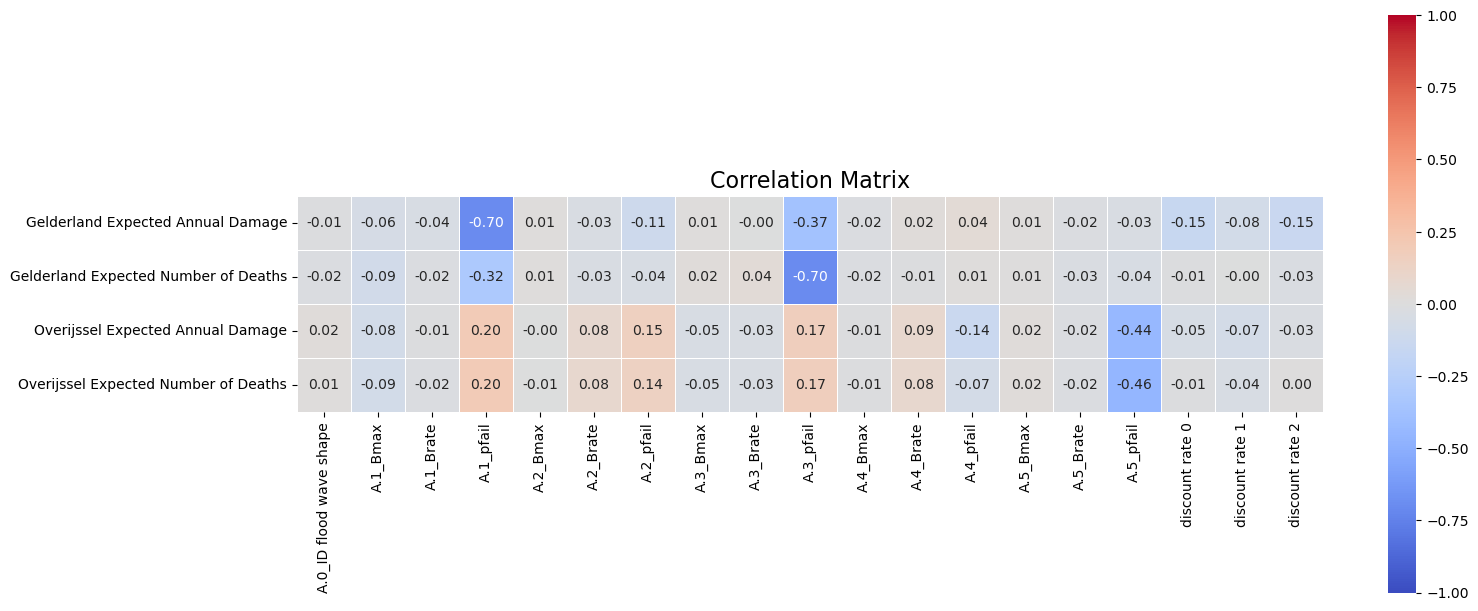

In [ ]:
# Selecting the rows and columns so we can compare the outcomes with the uncertainties
bottom_4_rows_first_10_cols = correlation_matrix.tail(4).iloc[:, :19]

# Plot heatmap of the selected subset
plt.figure(figsize=(16, 8))
sns.heatmap(bottom_4_rows_first_10_cols,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.75})

plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

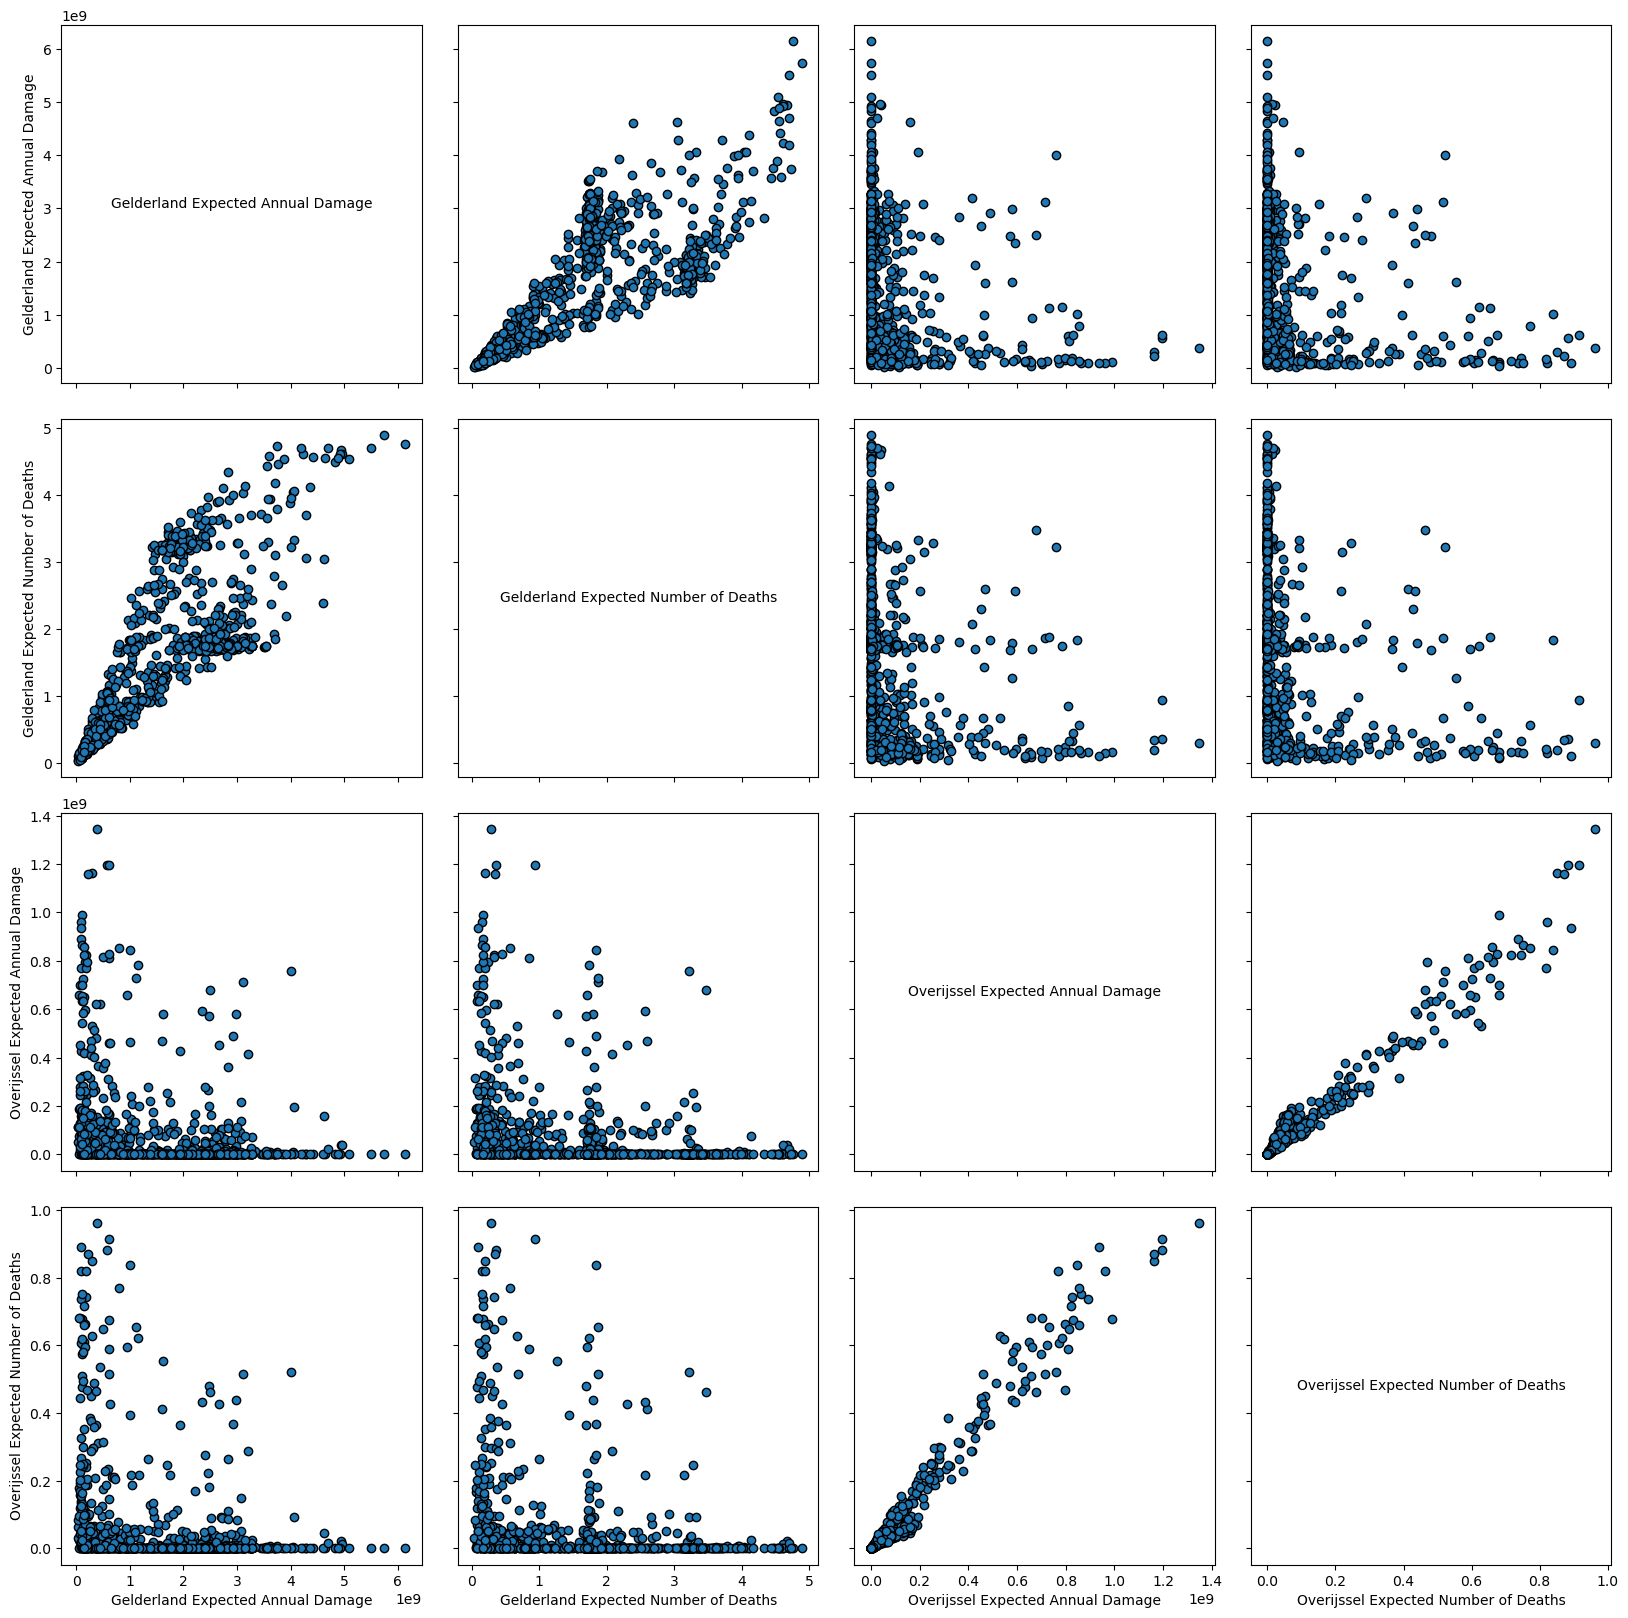

In [ ]:
from ema_workbench.analysis import pairs_plotting
# Outcomes we want to plot
selected_keys = [
    "Gelderland Expected Annual Damage",
    "Gelderland Expected Number of Deaths",
    "Overijssel Expected Annual Damage",
    "Overijssel Expected Number of Deaths"
]

# Create a new dictionary with only selected outcomes
selected_outcomes = {k: outcomes_no_policy[k] for k in selected_keys}

# Plotting the pairs scatter plot for the selected outcomes
fig, axes = pairs_plotting.pairs_scatter(experiments_no_policy, selected_outcomes, group_by="policy", legend=False)
fig.set_size_inches(20, 20)
plt.show()

In [ ]:
# Calculate and print the mean of each selected outcome
for key in selected_keys:
    mean_value = np.mean(outcomes_no_policy[key])
    print(f"Mean of {key}: {mean_value}")

Mean of Gelderland Expected Annual Damage: 1572896552.206913
Mean of Gelderland Expected Number of Deaths: 1.5264493064907474
Mean of Overijssel Expected Annual Damage: 77535157.13366765
Mean of Overijssel Expected Number of Deaths: 0.05978255122974629


**Policy Testing**

The code below was used to quickly test different policies.
This was done for the debates so we can test specific policies

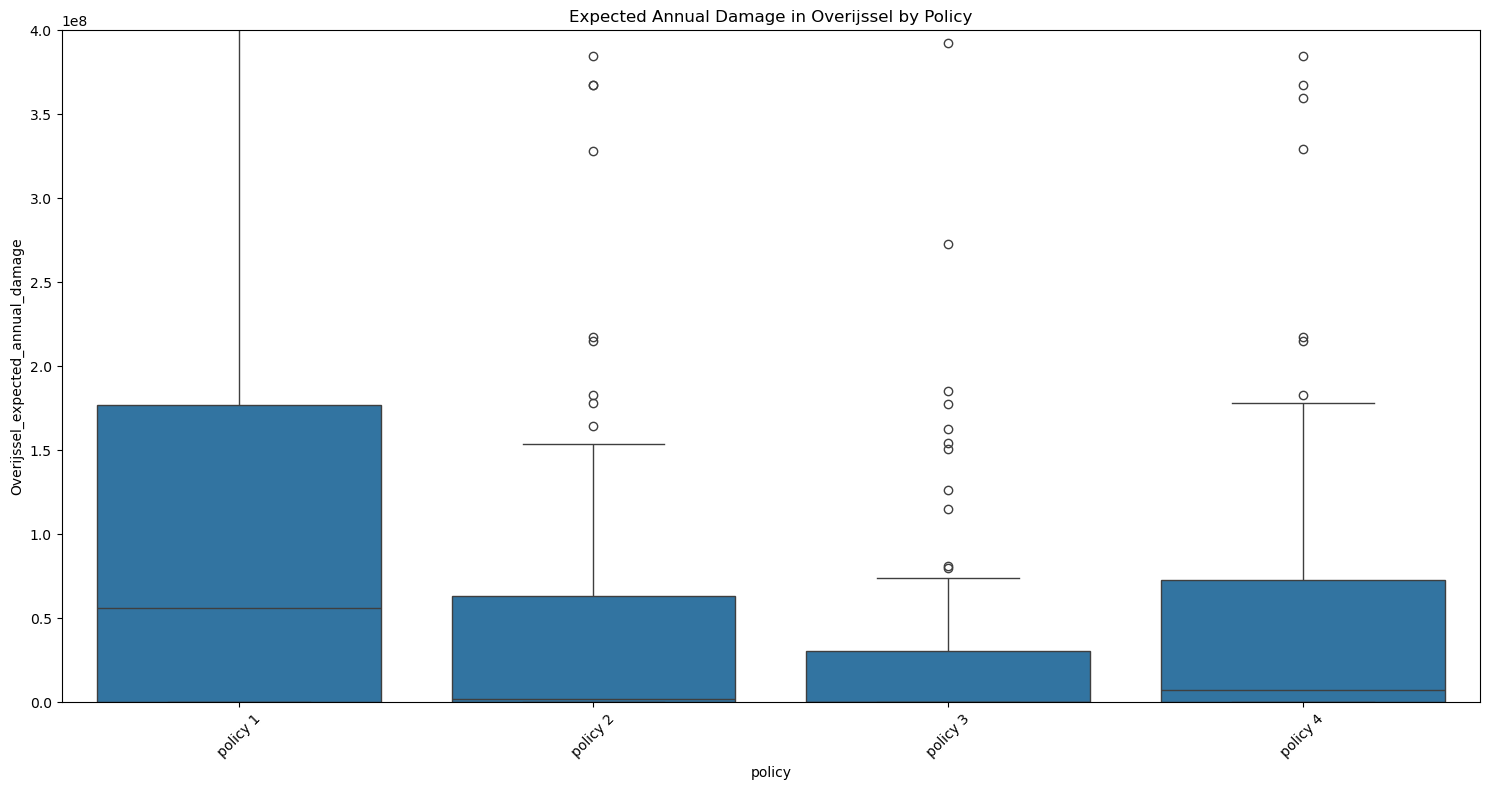

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert experiments and outcomes to a DataFrame
df_exp = pd.DataFrame(experiments)
df_outcomes = pd.DataFrame(outcomes)

# Add the outcome of interest to the experiments dataframe
df_exp["Overijssel_expected_annual_damage"] = df_outcomes["Overijssel Expected Annual Damage"]

# Now plot Overijssel expected annual damage vs. policy
plt.figure(figsize=(15, 8))
sns.boxplot(x="policy", y="Overijssel_expected_annual_damage", data=df_exp)
plt.xticks(rotation=45)
plt.title("Expected Annual Damage in Overijssel by Policy")
plt.ylim(0, 400000000)  # Set y-axis limit
plt.tight_layout()
plt.show()

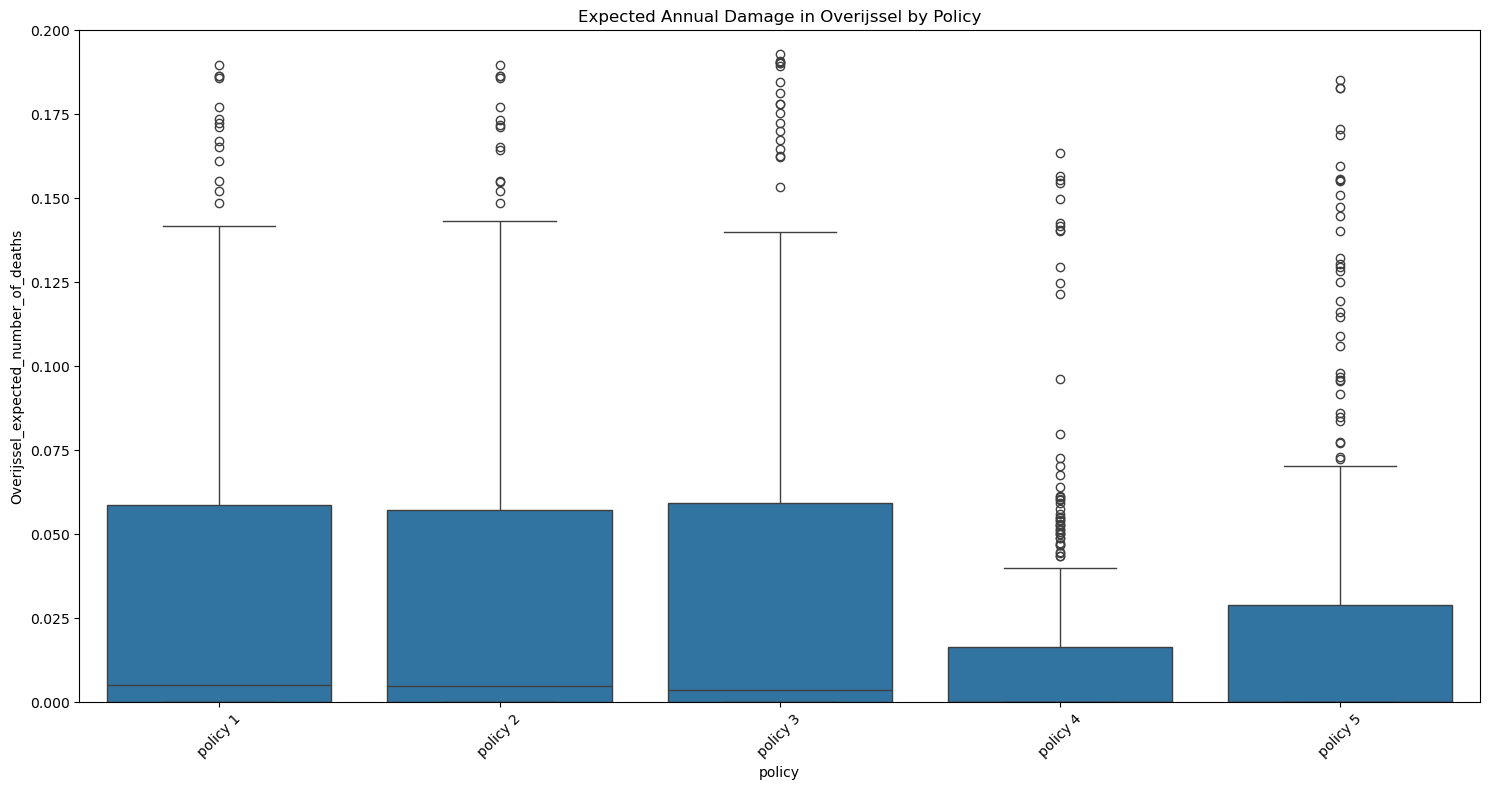

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert experiments and outcomes to a DataFrame
df_exp = pd.DataFrame(experiments)
df_outcomes = pd.DataFrame(outcomes)

# Add the outcome of interest to the experiments dataframe
df_exp["Overijssel_expected_number_of_deaths"] = df_outcomes["Overijssel Expected Number of Deaths"]

# Now plot Overijssel expected annual damage vs. policy
plt.figure(figsize=(15, 8))
sns.boxplot(x="policy", y="Overijssel_expected_number_of_deaths", data=df_exp)
plt.xticks(rotation=45)
plt.title("Expected Annual Damage in Overijssel by Policy")
plt.ylim(0, 0.2)  # Set y-axis limit
plt.tight_layout()
plt.show()